In [2]:
import numpy as np

# Part 1
A = np.array([[6, -2], [-2, 9]])
eigenvalues, eigenvectors = np.linalg.eig(A)

print("Eigenvalues:")
print(eigenvalues)

print("\nEigenvectors:")
print(eigenvectors)

Eigenvalues:
[ 5. 10.]

Eigenvectors:
[[-0.89442719  0.4472136 ]
 [-0.4472136  -0.89442719]]


In [6]:
P = eigenvectors
D = np.diag(eigenvalues)

A2 = P @ D @ P.T
A2

array([[ 6., -2.],
       [-2.,  9.]])

In [7]:
print(A2 == A)

[[ True  True]
 [ True  True]]


In [9]:
# Part 2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("ws2_india.csv")
df.head()

,Region,Total,Assamese,Bengali,Bodo,Dogri,Gujarati,Hindi,Kannada,Kashmiri,...,Odia,Punjabi,Sanskrit,Santali,Sindhi,Tamil,Telugu,Urdu,Total_Scheduled,Non_Scheduled
0,Jammu & Kashmir,10000,7,16,0,2004,15,2083,6,5327,...,175,0,0,0,12,11,16,9727,273.0,NaN
1,Himachal Pradesh,10000,2,9,0,34,15,8588,1,83,...,896,1,1,0,2,2,8,9791,209.0,NaN
2,Punjab,10000,1,10,0,7,5,935,1,1,...,8982,0,0,0,4,3,10,9986,14.0,NaN
3,Chandigarh,10000,4,59,0,10,15,7360,4,13,...,2203,0,0,1,53,13,100,9981,19.0,NaN
4,Uttarakhand,10000,2,150,0,5,4,8915,1,2,...,261,0,0,3,3,3,422,9944,56.0,NaN


In [10]:
# Feature Selection
regions = df["Region"]

feature_cols = [
    col for col in df.columns
    if col not in ["Region", "Total", "Total_Scheduled", "Non_Scheduled"]
]

X = df[feature_cols]

In [11]:
# Standardizing Data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [15]:
# PCA
from sklearn.decomposition import PCA

pca = PCA()
X_pca = pca.fit_transform(X_scaled)

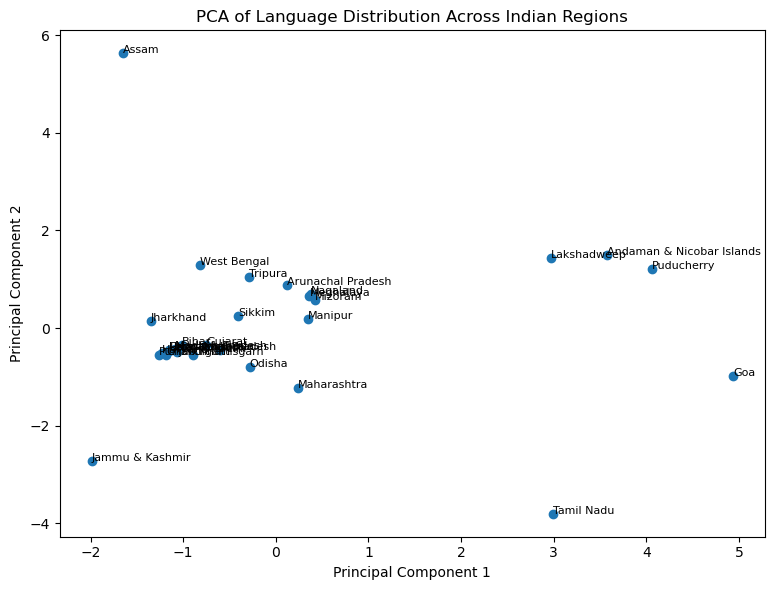

In [16]:
# Plotting Results

plt.figure(figsize=(8, 6))

plt.scatter(X_pca[:, 0], X_pca[:, 1])

for i, region in enumerate(regions):
    plt.text(X_pca[i, 0], X_pca[i, 1], region, fontsize=8)

plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA of Language Distribution Across Indian Regions")

plt.tight_layout()
plt.show()


In [17]:
loadings = pd.DataFrame(
    pca.components_[:2],
    columns=feature_cols,
    index=["PC1", "PC2"]
)

loadings.T.sort_values("PC1", ascending=False).head(10)

,PC1,PC2
Telugu,0.481662,0.116861
Kannada,0.346002,-0.201196
Tamil,0.306684,-0.328551
Santali,0.273896,0.116835
Punjabi,0.236970,0.106359
Sindhi,0.223523,-0.283058
Konkani,0.206630,0.130241
Malayalam,0.078968,0.005443
Manipuri,0.012507,-0.100372
Nepali,-0.020589,-0.060489
